<a href="https://colab.research.google.com/github/Suruchi-cmd/Stock-prediction/blob/main/STOCK_PRICE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Extraction
We extract the data, which is already available in the .csv format.

In [23]:
#@title 1.1 Download data
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

# Download datasource and create object DataFrame
print("Downloading data...")
data_utl = "https://ioipcorestorageaccount.blob.core.windows.net/lampton-college/data.csv"
req = requests.get(data_utl)
req = req.text
print("Download completed", int(len(req) / (1024 * 1024)), "Mb")

# Define constants with attribute names
SYMBOL = "symbol"
EXCHANGE = "exchange"
ASTERISK = '*'
OPTION_SYMBOL = 'option symbol'
ASK = "ask"
BID = "bid"
STOCK_PRICE_FOR_IV = 'stock price for iv'
MEAN_PRICE = "mean price"
DATE = "date"
CALL_PUT = "call/put"
VOLUME = "volume"
STRIKE = "strike"
ADJUSTED_CLOSE= "adjusted close"
OPEN_INTEREST = "open interest"
DELTA = "delta"
VEGA = "vega"
GAMMA = "gamma"
THETA = "theta"
RHO = "rho"
EXPIRATION = "expiration"

Download completed 33 Mb


In [24]:
#@title 1.2 Create DataFrame
data = StringIO(req)
df = pd.read_csv(data, parse_dates=['date', 'expiration'])
print('DataFrame created')
df.head()

DataFrame created


,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


# 2. Data validation and cleansing

### 2.1 Remove noise

In this step the missing the columns with the same values in all records are removed.

In [25]:
# Clear NA values
if (SYMBOL in df.columns):
  df = df.drop(SYMBOL, axis = 1)
if (EXCHANGE in df.columns):
  df = df.drop(EXCHANGE, axis = 1)
if (ASTERISK in df.columns):
  df = df.drop(ASTERISK, axis = 1)

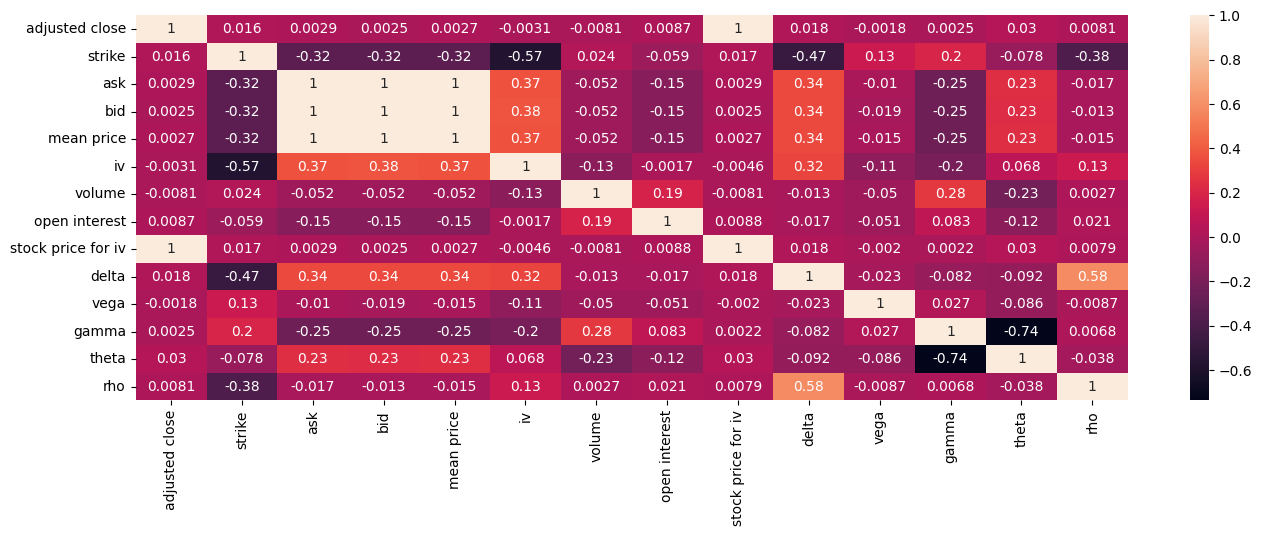

In [26]:
#@title 2.2 Analysis of variable correlation
#@markdown We analyze what variables are correlated with each other. We need to remove highly correlated variables.

import seaborn as sns

# Create a function to get variable correlation and show the image
def print_correlation_analysis():
  plt.figure(figsize = (16,5))
  # Get variable correlations
  correlation_matrix = df.corr(numeric_only=True)

  # Print image
  sns.heatmap(correlation_matrix, annot=True)


print_correlation_analysis()

Here, we observe that ask, bid and mean price are correlated with each other, so we only keep the mean price column.

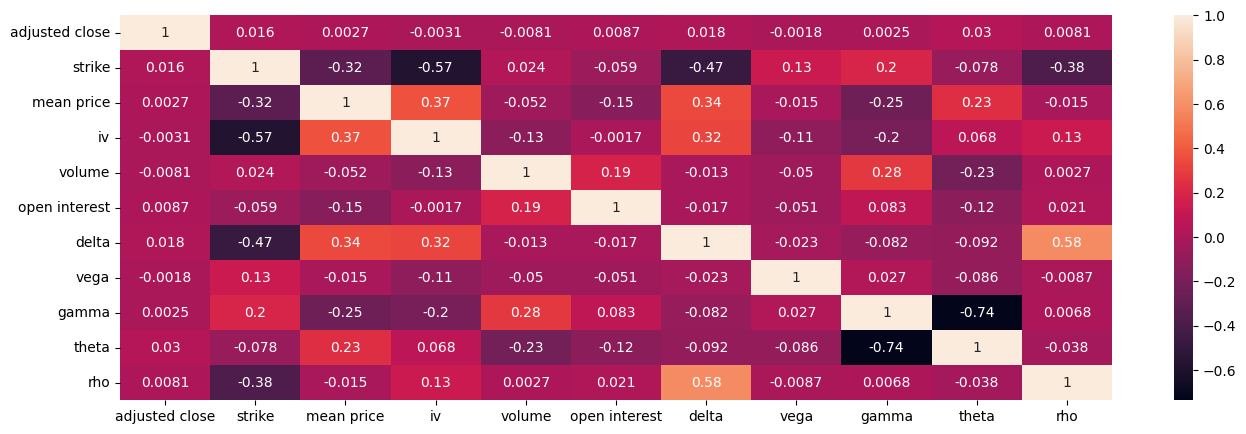

In [27]:
#@title 2.3 Remove columns with high correlations

if (ASK in df.columns):
  df = df.drop(ASK, axis = 1)
if (BID in df.columns):
  df = df.drop(BID, axis = 1)
if (STOCK_PRICE_FOR_IV in df.columns):
  df = df.drop(STOCK_PRICE_FOR_IV, axis = 1)

## Print new analysis
print_correlation_analysis()

In [28]:
#@title Create train DataFrame
#@markdown To create the train dataset, the rows between 2021-07-01 and 2021-07-29 are taken
tdf = df[df['date'] != "2021-07-30"]
print("Count:", tdf[DATE].count())

Count: 210320


# 3. Data Aggregation and Representation
We group the data frame by DATE and compute the mean of important columns for each group, creating two new data frames for rows where the value in the CALL_PUT column is "P" or "C", respectively.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Put the rest of variables, but the aggreation is only date, and option symbol
# group by the new column in the excel
df_columns = [ DATE, OPTION_SYMBOL, ADJUSTED_CLOSE, MEAN_PRICE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO ]
mean_columns = [MEAN_PRICE, ADJUSTED_CLOSE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO]
train_df_put = tdf[tdf[CALL_PUT] == "P"][df_columns].groupby([ DATE ])[mean_columns].mean().reset_index()
train_df_call = tdf[tdf[CALL_PUT] == "C"][df_columns].groupby([ DATE ])[mean_columns].mean().reset_index()

train_df_call

,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-01,59.035417,430.43,1021.502670,0.612746,0.508430,0.006018,-0.034175,0.809711
1,2021-07-02,60.305377,433.72,1036.324897,0.606896,0.503930,0.005870,-0.031772,0.815302
2,2021-07-06,58.706261,432.93,1004.091131,0.595316,0.503052,0.005738,-0.036079,0.793146
3,2021-07-07,60.129461,434.46,1024.692162,0.602596,0.509578,0.005653,-0.036364,0.805114
4,2021-07-08,57.875795,430.92,1045.134918,0.591200,0.520116,0.005634,-0.045818,0.788302
5,2021-07-09,60.879566,435.52,1085.856370,0.606217,0.504604,0.005633,-0.035978,0.800049
6,2021-07-12,61.365395,437.08,1047.803790,0.603704,0.500969,0.005555,-0.038248,0.794885
7,2021-07-13,60.015015,435.59,1063.279978,0.607019,0.509277,0.005586,-0.041909,0.788723
8,2021-07-14,59.916844,436.24,1104.037886,0.596157,0.502494,0.005513,-0.037131,0.779641
9,2021-07-15,58.952032,434.75,1107.283033,0.596415,0.508395,0.005623,-0.042861,0.776090


# 4. Data Analysis
We are trying to analyze a time series data. We can use ARIMA to forecast a time series data. For that, we need to analyze if the data or series is stationary.

In [30]:
# Check if serie is stationary

import warnings
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
serie = train_df_put[ADJUSTED_CLOSE]
check_result = adfuller(serie.dropna())
print('ADF Statistic:', check_result[0])
print('P-Value:', check_result[1])

# If P-Value < 0.05, the series is stationary

ADF Statistic: -3.169756652037401
P-Value: 0.021803392178295813


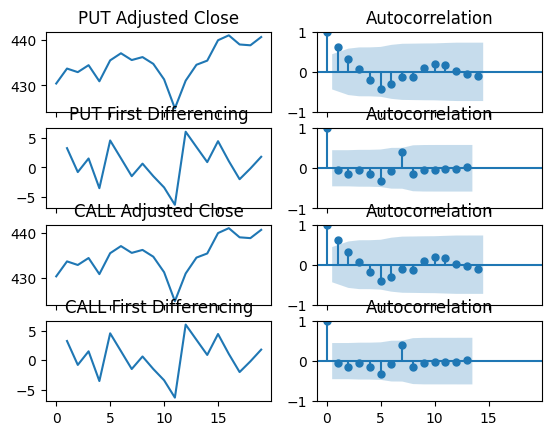

In [31]:
#@title Differenciating

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# The Genuine Series
fig, axes = plt.subplots(4, 2, sharex = True)
axes[0, 0].plot(train_df_put[ADJUSTED_CLOSE])
axes[0, 0].set_title('PUT Adjusted Close')
plot_acf(train_df_put[ADJUSTED_CLOSE], ax = axes[0, 1])

# Order of Differencing: First
axes[1, 0].plot(train_df_put[ADJUSTED_CLOSE].diff())
axes[1, 0].set_title('PUT First Differencing')
plot_acf(train_df_put[ADJUSTED_CLOSE].diff().dropna(), ax = axes[1, 1])

# CALL
axes[2, 0].plot(train_df_call[ADJUSTED_CLOSE])
axes[2, 0].set_title('CALL Adjusted Close')
plot_acf(train_df_call[ADJUSTED_CLOSE], ax = axes[2, 1])

# Order of Differencing: First
axes[3, 0].plot(train_df_call[ADJUSTED_CLOSE].diff())
axes[3, 0].set_title('CALL First Differencing')
plot_acf(train_df_call[ADJUSTED_CLOSE].diff().dropna(), ax = axes[3, 1])
plt.show()


In [32]:
#@title Find the order of the term AR (d)

from statsmodels.tsa.stattools import adfuller

#title Apply Dickey-Fuller to the differentiations
mean_price_serie = train_df_put[ADJUSTED_CLOSE]
check_result = adfuller(mean_price_serie.diff().dropna())
print('[1] ADF Statistic:', check_result[0])
print('[1] P-Value:', check_result[1])

d = 1 #(Number of differentitation)

[1] ADF Statistic: -1.6987416555672021
[1] P-Value: 0.4317609301291235


In [33]:
#@title Data Visualization

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Size of each graphic
fig_width = 480
fig_heigth = 270
fig_titles = ("PUT Mean price (Mean)", "PUT Adjusted close (Mean)",
              "PUT Open interest (Mean)", "PUT Delta (Mean)",
              "PUT Vega (Mean)", "PUT Gamma (Mean)",
              "PUT Theta (Mean)", "PUT Rho (Mean)",

              "CALL Mean price (Mean)", "CALL Adjusted close (Mean)",
              "CALL Open interest (Mean)", "CALL Delta (Mean)",
              "CALL Vega (Mean)", "CALL Gamma (Mean)",
              "CALL Theta (Mean)", "CALL Rho (Mean)")

fig = make_subplots(rows=8, cols=2, subplot_titles=fig_titles)

# PUT
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[MEAN_PRICE]), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[ADJUSTED_CLOSE]), row=1, col=2)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[OPEN_INTEREST]), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[DELTA]), row=2, col=2)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[VEGA]), row=3, col=1)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[GAMMA]), row=3, col=2)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[THETA]), row=4, col=1)
fig.add_trace(go.Scatter(x=train_df_put[DATE], y=train_df_put[RHO]), row=4, col=2)

# CALL
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[MEAN_PRICE]), row=5, col=1)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[ADJUSTED_CLOSE]), row=5, col=2)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[OPEN_INTEREST]), row=6, col=1)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[DELTA]), row=6, col=2)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[VEGA]), row=7, col=1)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[GAMMA]), row=7, col=2)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[THETA]), row=8, col=1)
fig.add_trace(go.Scatter(x=train_df_call[DATE], y=train_df_call[RHO]), row=8, col=2)

fig.update_layout(height=fig_heigth * 4, width=fig_width * 2, title_text="Data Visualisation")
fig.show()


#plt.plot(volume_put, x=DATE, y=VOLUME, label="PUT")


#plt.plot(price)
#plt.xticks(rotation=90)
#plt.show()

In [34]:
#@title Get the mean of the attributes for the day 30 and create test dataframe

test_df = df[(df['date'] == "2021-07-30")]
test_df_call = test_df[test_df[CALL_PUT] == "C"][df_columns].groupby([ DATE ])[[MEAN_PRICE, ADJUSTED_CLOSE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO]].mean().reset_index()
print(test_df_call.head())

test_df_put = test_df[test_df[CALL_PUT] == "P"][df_columns].groupby([ DATE ])[[MEAN_PRICE, ADJUSTED_CLOSE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO]].mean().reset_index()
print(test_df_put.head())


        date  mean price  adjusted close  open interest     delta      vega  \
0 2021-07-30   58.487133          438.51     1128.52396  0.579297  0.492414   

      gamma     theta       rho  
0  0.005439 -0.042027  0.746321  
        date  mean price  adjusted close  open interest    delta      vega  \
0 2021-07-30   23.247238          438.51    2428.313258 -0.38386  0.480595   

      gamma     theta       rho  
0  0.005422 -0.044384 -0.874286  


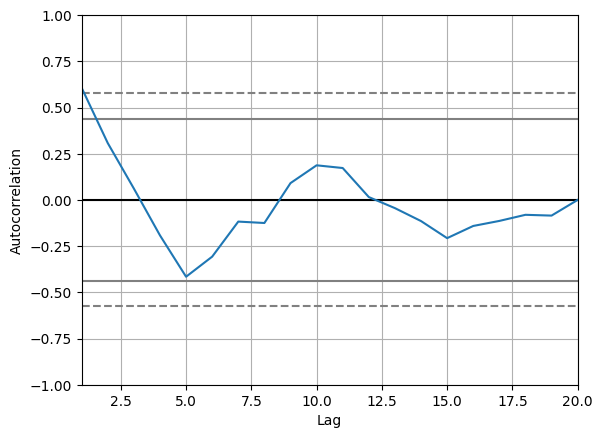

In [35]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train_df_put[ADJUSTED_CLOSE])
pyplot.show()

# ---- 99% confidence band
# ____ 95% confidence band

                               SARIMAX Results                                
Dep. Variable:         adjusted close   No. Observations:                   20
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -48.172
Date:                Wed, 26 Jul 2023   AIC                            112.345
Time:                        23:01:52   BIC                            120.310
Sample:                             0   HQIC                           113.900
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.0182      2.406    180.780      0.000     430.302     439.735
ar.L1          0.6583      1.206      0.546      0.585      -1.706       3.023
ar.L2         -0.5203      1.423     -0.366      0.7

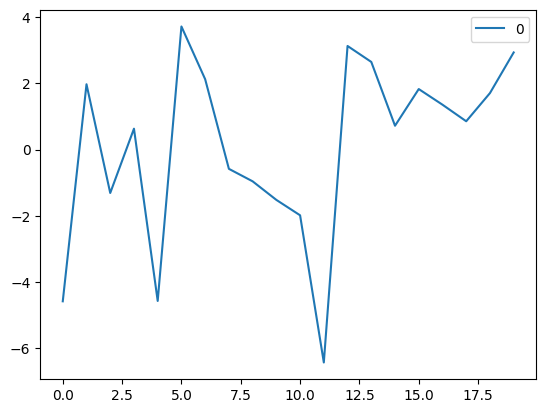

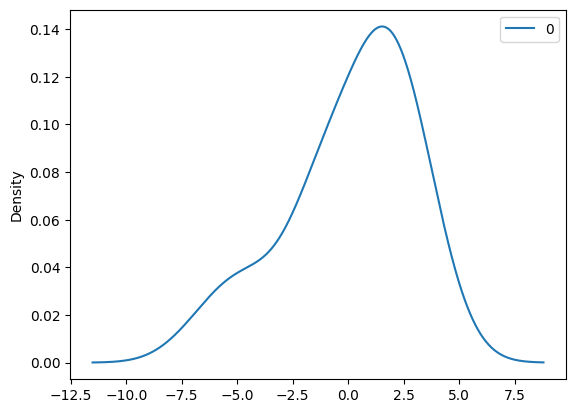

               0
count  20.000000
mean    0.083175
std     2.809741
min    -6.437300
25%    -1.365336
50%     0.787335
75%     2.011938
max     3.720717


In [36]:

# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot


# fit model
d = 0
p = 3
q = 3
model = ARIMA(train_df_put[ADJUSTED_CLOSE], order=(p, d, q))
model_fit = model.fit()


# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# Utilization of Data analysis
We used the ARIMA model to predict our time series data.

In [37]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

# df_mean = df[df_columns].groupby([DATE])[mean_columns].mean().reset_index()
data = train_df_put.loc[:, [DATE, ADJUSTED_CLOSE]]
data.set_index(DATE, inplace=True)

fig = go.Figure(data=go.Scatter(x=data.index, y=data[ADJUSTED_CLOSE]))
fig.update_layout(xaxis_title='Date', yaxis_title='Value', title='Time Series Data')
fig.show()


In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

df = train_df_put.loc[:, [DATE, ADJUSTED_CLOSE]]
df.set_index(DATE)

# Fit a SARIMAX model to the data
#model = SARIMAX(df[ADJUSTED_CLOSE], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model = ARIMA(df[ADJUSTED_CLOSE], order=(1, 0, 2)) # 20

results = model.fit()

# Get prediction for day 30
prediction_range = results.get_forecast(steps=1)

# Get the predicted values
predicted_values = prediction_range.predicted_mean
predicted = predicted_values[len(df)]
print("predicted value for 30th Day: ")
print(predicted)


p_df = predicted_values.to_frame()
p_df[DATE] = ['2021-07-30']

last_row = df.iloc[-1]
new_row = pd.DataFrame([last_row], columns=df.columns)



p_df[ADJUSTED_CLOSE]= p_df[0]
#p_df = pd.concat([new_row[ADJUSTED_CLOSE], p_df])
p_df.set_index(DATE)
p_df = p_df.drop(0, axis=1)

row = {DATE: pd.to_datetime('2021-07-29'), ADJUSTED_CLOSE: last_row[ADJUSTED_CLOSE]}
p_df = p_df.append(row, ignore_index=True)



print(p_df)

#p_df[DATE] = pd.date_range(start=, end='2021-07-30')


# Create traces
original_trace = go.Scatter(
    x=df[DATE],
    y=df[ADJUSTED_CLOSE],
    mode='lines',
    name='Original Data'
)

predicted_trace = go.Scatter(
    x=p_df[DATE],
    y=p_df[ADJUSTED_CLOSE],
    mode='lines',
    name='Predicted Values',
    line=dict(color='red')
)

# Create layout
layout = go.Layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title=ADJUSTED_CLOSE),
    title='SARIMAX Prediction',
    showlegend=True
)

# Create figure and add traces
fig = go.Figure(data=[original_trace, predicted_trace], layout=layout)

# Show the figure
fig.show()


predicted value for 30th Day: 
438.92051312342284
                  date  adjusted close
0           2021-07-30      438.920513
1  2021-07-29 00:00:00      440.650000


## Error Calculation

In [39]:
import numpy as np
# predictions = 435.0942806134678
y_test = 438.51
rmse=np.sqrt(np.mean(((predicted- y_test)**2)))
print(rmse)

0.4105131234228452


The error is only 0.4105131234228452 for adjusted close.

# More predictions

In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go




# Size of each graphic
fig_width = 480
fig_heigth = 270
fig_titles = (ADJUSTED_CLOSE + " PUT", MEAN_PRICE + " PUT",
              OPEN_INTEREST + " PUT", DELTA + " PUT",
              VEGA + " PUT", GAMMA + " PUT",
              THETA + " PUT", RHO + " PUT",

              ADJUSTED_CLOSE + " CALL", MEAN_PRICE + " CALL",
              OPEN_INTEREST + " CALL", DELTA + " CALL",
              VEGA + " CALL", GAMMA + " CALL",
              THETA + " CALL", RHO + " CALL")

fig = make_subplots(rows=8, cols=2, subplot_titles=fig_titles)



def create_prediction(dataframe, dataframe_column, row, column):
  df = dataframe.loc[:, [DATE, dataframe_column]]
  df.set_index(DATE)

  # Fit a SARIMAX model to the data
  #model = SARIMAX(df[dataframe_column], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) # 12
  model = ARIMA(df[dataframe_column], order=(1, 0, 2)) # 20
  results = model.fit()

  # Get prediction for day 30
  prediction_range = results.get_forecast(steps=1)

  # Get the predicted values
  predicted_values = prediction_range.predicted_mean
  return predicted_values[len(df)]

adjusted_close_put = create_prediction(train_df_put, ADJUSTED_CLOSE, 1, 1)
mean_price_put = create_prediction(train_df_put, MEAN_PRICE, 1, 2)
open_interest_put = create_prediction(train_df_put, OPEN_INTEREST, 2, 1)
delta_put = create_prediction(train_df_put, DELTA, 2, 2)
vega_put = create_prediction(train_df_put, VEGA, 3, 1)
gamma_put = create_prediction(train_df_put, GAMMA, 3, 2)
theta_put = create_prediction(train_df_put, THETA, 4, 1)
rho_put = create_prediction(train_df_put, RHO, 4, 2)

adjusted_close_call = create_prediction(train_df_call, ADJUSTED_CLOSE, 5, 1)
mean_price_call = create_prediction(train_df_call, MEAN_PRICE, 5, 2)
open_interest_call = create_prediction(train_df_call, OPEN_INTEREST, 6, 1)
delta_call = create_prediction(train_df_call, DELTA, 6, 2)
vega_call = create_prediction(train_df_call, VEGA, 7, 1)
gamma_call = create_prediction(train_df_call, GAMMA, 7, 2)
theta_call = create_prediction(train_df_call, THETA, 8, 1)
rho_call = create_prediction(train_df_call, RHO, 8, 2)


# Creating two tables
predicted_data_put = {
    DATE: ['2021-07-30'],
    MEAN_PRICE: [mean_price_put],
    ADJUSTED_CLOSE: [adjusted_close_put],
    OPEN_INTEREST: [open_interest_put],
    DELTA: [delta_put],
    VEGA: [vega_put],
    GAMMA: [gamma_put],
    THETA: [theta_put],
    RHO: [rho_put]
}

predicted_data_call = {
    DATE: ['2021-07-30'],
    MEAN_PRICE: [mean_price_call],
    ADJUSTED_CLOSE: [adjusted_close_call],
    OPEN_INTEREST: [open_interest_call],
    DELTA: [delta_call],
    VEGA: [vega_call],
    GAMMA: [gamma_call],
    THETA: [theta_call],
    RHO: [rho_call]
}
df_put = pd.DataFrame(predicted_data_put)
df_call = pd.DataFrame(predicted_data_call)
print("Expected put row")
test_df_put.head()

Expected put row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,23.247238,438.51,2428.313258,-0.38386,0.480595,0.005422,-0.044384,-0.874286


In [41]:
print("Predicted put row")
df_put.head()

Predicted put row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,23.200492,438.920513,2322.487586,-0.384786,0.498598,0.00561,-0.044505,-0.898484


In [42]:
print("Expected call row")
test_df_call.head()

Expected call row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,58.487133,438.51,1128.52396,0.579297,0.492414,0.005439,-0.042027,0.746321


In [43]:
print("Predicted call row")
df_call.head()

Predicted call row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,59.366811,438.920513,1096.887277,0.603043,0.501712,0.005656,-0.039817,0.773853


In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go




# Size of each graphic
fig_width = 480
fig_heigth = 270
fig_titles = (ADJUSTED_CLOSE + " PUT", MEAN_PRICE + " PUT",
              OPEN_INTEREST + " PUT", DELTA + " PUT",
              VEGA + " PUT", GAMMA + " PUT",
              THETA + " PUT", RHO + " PUT",

              ADJUSTED_CLOSE + " CALL", MEAN_PRICE + " CALL",
              OPEN_INTEREST + " CALL", DELTA + " CALL",
              VEGA + " CALL", GAMMA + " CALL",
              THETA + " CALL", RHO + " CALL")

fig = make_subplots(rows=8, cols=2, subplot_titles=fig_titles)



def create_prediction(dataframe, dataframe_column, row, column):

  df = dataframe.loc[:, [DATE, dataframe_column]]
  df.set_index(DATE)

  # Fit a SARIMAX model to the data
  #model = SARIMAX(df[dataframe_column], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) # 12
  results = ARIMA(df[dataframe_column], order=(1, 0, 2)).fit() # 20
  prediction_range = results.get_forecast(steps=1)

  # Get the predicted values
  predicted_values = prediction_range.predicted_mean
  predicted = predicted_values[len(df)]
  print("predicted value for 30th Day: ")
  print(predicted)
  print("================================")

  p_df = predicted_values.to_frame()
  p_df[DATE] = ['2021-07-30']

  last_row = df.iloc[-1]
  new_row = pd.DataFrame([last_row], columns=df.columns)

  p_df[dataframe_column]= p_df[0]
  p_df.set_index(DATE)
  p_df = p_df.drop(0, axis=1)
  p_df = p_df.append({DATE: '2021-07-29', dataframe_column: last_row[dataframe_column]}, ignore_index=True)

  original_trace = go.Scatter(
      x=df[DATE],
      y=df[dataframe_column],
      mode='lines',
      name=dataframe_column +' (Original Data)'
  )

  predicted_trace = go.Scatter(
      x=p_df[DATE],
      y=p_df[dataframe_column],
      mode='lines',
      name=dataframe_column + '(Predicted Values)',
      line=dict(color='red')
  )

  # Create layout
  layout = go.Layout(
      xaxis=dict(title='Date'),
      yaxis=dict(title=dataframe_column),
      title='ARIMA Prediction',
      showlegend=True
  )

  fig.add_trace(go.Scatter(original_trace), row=row, col=column)
  fig.add_trace(go.Scatter(predicted_trace), row=row, col=column)

create_prediction(train_df_put, ADJUSTED_CLOSE, 1, 1)
create_prediction(train_df_put, MEAN_PRICE, 1, 2)
create_prediction(train_df_put, OPEN_INTEREST, 2, 1)
create_prediction(train_df_put, DELTA, 2, 2)
create_prediction(train_df_put, VEGA, 3, 1)
create_prediction(train_df_put, GAMMA, 3, 2)
create_prediction(train_df_put, THETA, 4, 1)
create_prediction(train_df_put, RHO, 4, 2)

create_prediction(train_df_call, ADJUSTED_CLOSE, 5, 1)
create_prediction(train_df_call, MEAN_PRICE, 5, 2)
create_prediction(train_df_call, OPEN_INTEREST, 6, 1)
create_prediction(train_df_call, DELTA, 6, 2)
create_prediction(train_df_call, VEGA, 7, 1)
create_prediction(train_df_call, GAMMA, 7, 2)
create_prediction(train_df_call, THETA, 8, 1)
create_prediction(train_df_call, RHO, 8, 2)

# PUT

fig.update_layout(height=fig_heigth * 4, width=fig_width * 2, title_text="Predictions")
fig.show()

predicted value for 30th Day: 
438.92051312342284
predicted value for 30th Day: 
23.200491610438146
predicted value for 30th Day: 
2322.4875855847886
predicted value for 30th Day: 
-0.38478631771825017
predicted value for 30th Day: 
0.4985980437153752
predicted value for 30th Day: 
0.005609568778821017
predicted value for 30th Day: 
-0.044504765714492994
predicted value for 30th Day: 
-0.8984843392229314
predicted value for 30th Day: 
438.92051312342284
predicted value for 30th Day: 
59.36681077660015
predicted value for 30th Day: 
1096.8872766178383
predicted value for 30th Day: 
0.6030431388151168
predicted value for 30th Day: 
0.5017122436063886
predicted value for 30th Day: 
0.005655958012510885
predicted value for 30th Day: 
-0.03981669709699681
predicted value for 30th Day: 
0.7738531888953126


In [45]:
#Download data
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download datasource and create object DataFrame
print("Downloading data...")
data_utl = "https://ioipcorestorageaccount.blob.core.windows.net/lampton-college/data.csv"
req = requests.get(data_utl)
req = req.text
print("Download completed", int(len(req) / (1024 * 1024)), "Mb")

# Define constants with attribute names
SYMBOL = "symbol"
EXCHANGE = "exchange"
ASTERISK = '*'
OPTION_SYMBOL = 'option symbol'
ASK = "ask"
BID = "bid"
STOCK_PRICE_FOR_IV = 'stock price for iv'
MEAN_PRICE = "mean price"
DATE = "date"
CALL_PUT = "call/put"
VOLUME = "volume"
STRIKE = "strike"
ADJUSTED_CLOSE= "adjusted close"
OPEN_INTEREST = "open interest"
DELTA = "delta"
VEGA = "vega"
GAMMA = "gamma"
THETA = "theta"
RHO = "rho"
EXPIRATION = "expiration"
SPREAD = "spread"

Download completed 33 Mb


# Task No. 1 Scaling vs Without Scaling
Compare your Activity 2 result with and without first scaling your dataset.

In [46]:
# Create DataFrame
data = StringIO(req)
df = pd.read_csv(data, parse_dates=['date', 'expiration'])
print('DataFrame created')
df.head()

DataFrame created


,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [47]:
# Clear NA values
if (SYMBOL in df.columns):
  df = df.drop(SYMBOL, axis = 1)
if (EXCHANGE in df.columns):
  df = df.drop(EXCHANGE, axis = 1)
if (ASTERISK in df.columns):
  df = df.drop(ASTERISK, axis = 1)

In [48]:
# Analysis of variable correlation

import seaborn as sns

# Create a function to get variable correlation and show the image
def print_correlation_analysis():
  plt.figure(figsize = (16,5))
  # Get variable correlations
  correlation_matrix = df.corr(numeric_only=True)

In [49]:
#Remove columns with high correlations

if (ASK in df.columns):
  df = df.drop(ASK, axis = 1)
if (BID in df.columns):
  df = df.drop(BID, axis = 1)
if (STOCK_PRICE_FOR_IV in df.columns):
  df = df.drop(STOCK_PRICE_FOR_IV, axis = 1)

## Print new analysis
# print_correlation_analysis()

In [50]:

tdf = df

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Put the rest of variables, but the aggreation is only date, and option symbol
# group by the new column in the excel
df_columns = [ DATE, OPTION_SYMBOL, ADJUSTED_CLOSE, MEAN_PRICE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO ]
mean_columns = [MEAN_PRICE, ADJUSTED_CLOSE, OPEN_INTEREST, DELTA, VEGA, GAMMA, THETA, RHO]
df_put = tdf[tdf[CALL_PUT] == "P"][df_columns].groupby([ DATE ])[mean_columns].mean().reset_index()
df_call = tdf[tdf[CALL_PUT] == "C"][df_columns].groupby([ DATE ])[mean_columns].mean().reset_index()

In [52]:
#@title Scale the data
from sklearn.preprocessing import StandardScaler

# Extract the date column
dates = df_put[DATE]

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_put.drop([DATE], axis=1))

# Create a new DataFrame with scaled data and the date column
scaled_df_put = pd.DataFrame(scaled_data, columns=df_put.columns[1:])
scaled_df_put[DATE] = dates

# Print the scaled dataset
scaled_df_put.head()

# Extract the date column
dates_call = df_call[DATE]

# Standardize the dataset
scaler_call = StandardScaler()
scaled_data_call = scaler_call.fit_transform(df_call.drop([DATE], axis=1))

# Create a new DataFrame with scaled data and the date column
scaled_df_call = pd.DataFrame(scaled_data_call, columns=df_call.columns[1:])
scaled_df_call[DATE] = dates_call

# Print the scaled dataset
scaled_df_call.head()


,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho,date
0,0.093641,-1.203026,-1.410975,1.110722,0.138630,2.341130,1.356503,1.219909,2021-07-01
1,0.787302,-0.354460,-1.050988,0.820237,-0.508088,1.559004,1.841605,1.458719,2021-07-02
2,-0.086146,-0.558219,-1.833848,0.245193,-0.634218,0.864888,0.972350,0.512371,2021-07-06
3,0.691215,-0.163597,-1.333512,0.606721,0.303526,0.414877,0.914820,1.023587,2021-07-07
4,-0.539752,-1.076644,-0.837019,0.040813,1.817758,0.311785,-0.993445,0.305461,2021-07-08


In [53]:
#@title Create train DataFrame
#To create the train dataset, the rows between 2021-07-01 and 2021-07-29 are taken
train_df_put = scaled_df_put[scaled_df_put['date'] != "2021-07-30"]
train_df_call = scaled_df_call[scaled_df_call['date'] != "2021-07-30"]

In [54]:
#@title Create test DataFrame
# To create the test dataset, the rows on 2021-07-30 are taken
test_df_put = scaled_df_put[scaled_df_put['date'] == "2021-07-30"]

test_df_call = scaled_df_call[scaled_df_call['date'] == "2021-07-30"]
# test_df_call


In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

df = train_df_put.loc[:, [DATE, ADJUSTED_CLOSE]]
df.set_index(DATE)

# Fit a SARIMAX model to the data
#model = SARIMAX(df[ADJUSTED_CLOSE], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model = ARIMA(df[ADJUSTED_CLOSE], order=(1, 0, 2)) # 20

results = model.fit()

# Get prediction for day 30
prediction_range = results.get_forecast(steps=1)

# Get the predicted values
predicted_values = prediction_range.predicted_mean
predicted = predicted_values[len(df)]
print("predicted value for 30th Day: ")
print(predicted)


p_df = predicted_values.to_frame()
p_df[DATE] = ['2021-07-30']

last_row = df.iloc[-1]
new_row = pd.DataFrame([last_row], columns=df.columns)



p_df[ADJUSTED_CLOSE]= p_df[0]
#p_df = pd.concat([new_row[ADJUSTED_CLOSE], p_df])
p_df.set_index(DATE)
p_df = p_df.drop(0, axis=1)

row = {DATE: pd.to_datetime('2021-07-29'), ADJUSTED_CLOSE: last_row[ADJUSTED_CLOSE]}
p_df = p_df.append(row, ignore_index=True)





predicted value for 30th Day: 
0.9868795510810284


In [56]:
import numpy as np
# predictions = 435.0942806134678
y_test = 438.51
rmse=np.sqrt(np.mean(((predicted- y_test)**2)))
print(rmse)

437.523120448919


In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go

def create_prediction(dataframe, dataframe_column, row, column):
  df = dataframe.loc[:, [DATE, dataframe_column]]
  df.set_index(DATE)

  # Fit a SARIMAX model to the data
  #model = SARIMAX(df[dataframe_column], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12)) # 12
  model = ARIMA(df[dataframe_column], order=(1, 0, 2)) # 20
  results = model.fit()

  # Get prediction for day 30
  prediction_range = results.get_forecast(steps=1)

  # Get the predicted values
  predicted_values = prediction_range.predicted_mean
  return predicted_values[len(df)]

adjusted_close_put = create_prediction(train_df_put, ADJUSTED_CLOSE, 1, 1)
mean_price_put = create_prediction(train_df_put, MEAN_PRICE, 1, 2)
open_interest_put = create_prediction(train_df_put, OPEN_INTEREST, 2, 1)
delta_put = create_prediction(train_df_put, DELTA, 2, 2)
vega_put = create_prediction(train_df_put, VEGA, 3, 1)
gamma_put = create_prediction(train_df_put, GAMMA, 3, 2)
theta_put = create_prediction(train_df_put, THETA, 4, 1)
rho_put = create_prediction(train_df_put, RHO, 4, 2)

adjusted_close_call = create_prediction(train_df_call, ADJUSTED_CLOSE, 5, 1)
mean_price_call = create_prediction(train_df_call, MEAN_PRICE, 5, 2)
open_interest_call = create_prediction(train_df_call, OPEN_INTEREST, 6, 1)
delta_call = create_prediction(train_df_call, DELTA, 6, 2)
vega_call = create_prediction(train_df_call, VEGA, 7, 1)
gamma_call = create_prediction(train_df_call, GAMMA, 7, 2)
theta_call = create_prediction(train_df_call, THETA, 8, 1)
rho_call = create_prediction(train_df_call, RHO, 8, 2)


# Creating two tables
predicted_data_put = {
    DATE: ['2021-07-30'],
    MEAN_PRICE: [mean_price_put],
    ADJUSTED_CLOSE: [adjusted_close_put],
    OPEN_INTEREST: [open_interest_put],
    DELTA: [delta_put],
    VEGA: [vega_put],
    GAMMA: [gamma_put],
    THETA: [theta_put],
    RHO: [rho_put]
}

predicted_data_call = {
    DATE: ['2021-07-30'],
    MEAN_PRICE: [mean_price_call],
    ADJUSTED_CLOSE: [adjusted_close_call],
    OPEN_INTEREST: [open_interest_call],
    DELTA: [delta_call],
    VEGA: [vega_call],
    GAMMA: [gamma_call],
    THETA: [theta_call],
    RHO: [rho_call]
}
df_put = pd.DataFrame(predicted_data_put)
df_call = pd.DataFrame(predicted_data_call)
print("Expected put row")
test_df_put.head()

Expected put row


,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho,date
20,-0.33131,0.880991,1.553186,0.087578,-2.478541,-0.975891,-0.048245,1.484628,2021-07-30


In [58]:
print("Predicted put row")
df_put.head()

Predicted put row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,-0.361011,0.98688,0.169973,0.040101,0.21954,0.468354,-0.197663,0.631932


In [59]:
print("Expected call row")
test_df_call.head()

Expected call row


,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho,date
20,-0.205835,0.880991,1.188248,-0.550246,-2.162734,-0.716095,-0.228248,-1.487748,2021-07-30


In [60]:
print("Predicted call row")
df_call.head()

Predicted call row


,date,mean price,adjusted close,open interest,delta,vega,gamma,theta,rho
0,2021-07-30,0.274649,0.98688,0.41988,0.629077,-0.823737,0.511252,0.21437,-0.311621


In [61]:
#@title Comparision of results

predicted = 0.98688
expected = 0.880991
error = ((predicted - expected)/expected)*100
error

12.019305532065596

In [62]:
predicted_without_scaling = 435.0942806134678
expected_without_scaling = 438.51
error_without_scaling = ((predicted_without_scaling - expected_without_scaling)/expected_without_scaling)*100
error_without_scaling


-0.7789376266293135

## Our results are better without scaling the dataset, as there is 0.77% without scaling and 12% error after scaling.

# Task 3 PCA

Use Dimension Reduction PCA to rank the importance of each feature and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

In [63]:
#@title Create DataFrame

data = StringIO(req)
original_df = pd.read_csv(data, parse_dates=[DATE, EXPIRATION])
original_df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00215000,2021-07-30,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00215000,2021-07-30,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00220000,2021-07-30,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,2021-07-30,438.51,SPY 210730P00220000,2021-07-30,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,2021-07-30,438.51,SPY 210730C00225000,2021-07-30,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [64]:
original_df.shape

(221046, 22)

In [65]:
#@title Check is exist na values, and exclude object columns
train_df = original_df[(original_df[CALL_PUT] == "P") & (original_df[DATE] < "2021-07-30")].select_dtypes(exclude=['O'])
test_df = original_df[(original_df[CALL_PUT] == "P") & (original_df[DATE] == "2021-07-30")].select_dtypes(exclude=['O'])
train_df.isnull().sum().sum()

0

In [66]:
train_df.head()

,date,adjusted close,expiration,strike,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
10727,2021-07-29,440.65,2021-07-30,215.0,0.01,0.0,0.0,0.325459,0,1401,440.13,0.0,0.0,0.0,0.0,0.0
10729,2021-07-29,440.65,2021-07-30,220.0,0.01,0.0,0.0,0.325459,0,328,440.13,0.0,0.0,0.0,0.0,0.0
10731,2021-07-29,440.65,2021-07-30,225.0,0.01,0.0,0.0,0.325459,0,1996,440.13,0.0,0.0,0.0,0.0,0.0
10733,2021-07-29,440.65,2021-07-30,230.0,0.01,0.0,0.0,0.325459,0,3764,440.13,0.0,0.0,0.0,0.0,0.0
10735,2021-07-29,440.65,2021-07-30,235.0,0.01,0.0,0.0,0.325459,0,1361,440.13,0.0,0.0,0.0,0.0,0.0


In [67]:
#@title Remove date columns
set_columns = set(train_df.columns) - set([DATE, EXPIRATION])
train_df2 = train_df[set_columns].copy()

In [68]:
train_df2.head()

,stock price for iv,volume,delta,mean price,bid,rho,ask,vega,adjusted close,iv,gamma,strike,open interest,theta
10727,440.13,0,0.0,0.0,0.0,0.0,0.01,0.0,440.65,0.325459,0.0,215.0,1401,0.0
10729,440.13,0,0.0,0.0,0.0,0.0,0.01,0.0,440.65,0.325459,0.0,220.0,328,0.0
10731,440.13,0,0.0,0.0,0.0,0.0,0.01,0.0,440.65,0.325459,0.0,225.0,1996,0.0
10733,440.13,0,0.0,0.0,0.0,0.0,0.01,0.0,440.65,0.325459,0.0,230.0,3764,0.0
10735,440.13,0,0.0,0.0,0.0,0.0,0.01,0.0,440.65,0.325459,0.0,235.0,1361,0.0


In [69]:
#@title #Correlations
corr = train_df2.corr()
corr.head()

,stock price for iv,volume,delta,mean price,bid,rho,ask,vega,adjusted close,iv,gamma,strike,open interest,theta
stock price for iv,1.000000,-0.013975,0.031144,-0.025083,-0.025284,0.010067,-0.024875,-0.001100,0.996755,-0.004546,0.002409,0.015573,0.010450,0.037059
volume,-0.013975,1.000000,0.046583,-0.054336,-0.054126,0.044731,-0.054535,-0.057635,-0.013659,-0.130507,0.284357,0.019530,0.181639,-0.281698
delta,0.031144,0.046583,1.000000,-0.676431,-0.677535,0.416611,-0.675200,-0.084798,0.031114,0.370822,-0.154114,-0.784838,0.217838,-0.137846
mean price,-0.025083,-0.054336,-0.676431,1.000000,0.999910,-0.809615,0.999910,0.122796,-0.025337,-0.210717,-0.155464,0.710403,-0.157373,0.272450
bid,-0.025284,-0.054126,-0.677535,0.999910,1.000000,-0.805247,0.999644,0.117451,-0.025593,-0.210735,-0.154612,0.711878,-0.156713,0.271446


<Axes: >

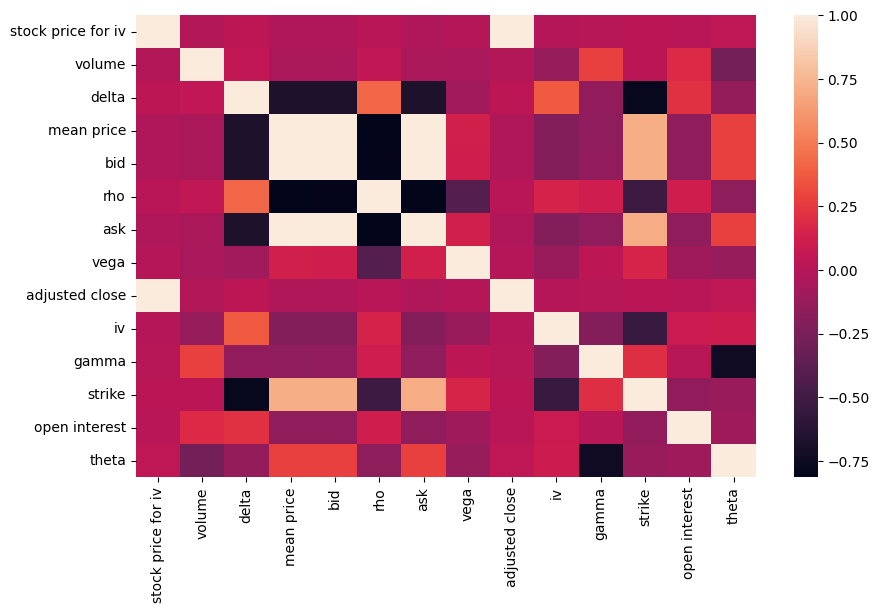

In [70]:
#@title #Correlations (Graph)
plt.figure(figsize=(10, 6))
sns.heatmap(corr)

In [71]:
#@title #Variable scale

from sklearn.preprocessing import StandardScaler
std = StandardScaler() # Create instance
std_train = std.fit_transform(train_df2) # Scale original data
scaled_features_df = pd.DataFrame(std_train, index=train_df2.index, columns=train_df2.columns)

# Create new DataFrame with scaled values
scaled_features_df.head()

,stock price for iv,volume,delta,mean price,bid,rho,ask,vega,adjusted close,iv,gamma,strike,open interest,theta
10727,1.403834,-0.097379,1.037772,-0.610035,-0.607996,0.488856,-0.611739,-0.913589,1.477765,0.465859,-0.609151,-1.957396,-0.113221,1.091089
10729,1.403834,-0.097379,1.037772,-0.610035,-0.607996,0.488856,-0.611739,-0.913589,1.477765,0.465859,-0.609151,-1.904063,-0.259321,1.091089
10731,1.403834,-0.097379,1.037772,-0.610035,-0.607996,0.488856,-0.611739,-0.913589,1.477765,0.465859,-0.609151,-1.850730,-0.032205,1.091089
10733,1.403834,-0.097379,1.037772,-0.610035,-0.607996,0.488856,-0.611739,-0.913589,1.477765,0.465859,-0.609151,-1.797397,0.208526,1.091089
10735,1.403834,-0.097379,1.037772,-0.610035,-0.607996,0.488856,-0.611739,-0.913589,1.477765,0.465859,-0.609151,-1.744064,-0.118667,1.091089


In [72]:
test_df2 = test_df[set_columns].copy()
std_test = std.transform(test_df2) # In this case we need to use transform instead of fit_transform because the test need to use the same parameters on train

In [73]:
#@title Principal componentes

from  sklearn.decomposition import PCA
pca = PCA().fit(std_train)

In [74]:
#@title Principal componentes (Identify variance of each component)

arr_variance = pca.explained_variance_ratio_

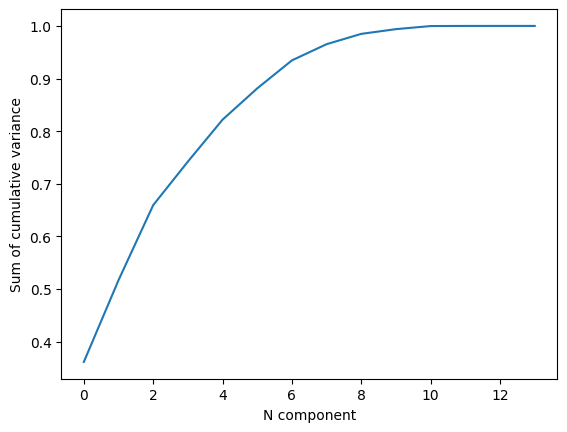

In [75]:
sum_cumulative_variance = np.cumsum(arr_variance)
plt.plot(sum_cumulative_variance)
plt.xlabel("N component")
plt.ylabel("Sum of cumulative variance")
plt.show()

In [76]:
#@title Identify the number of components required to get at least 90%

components = np.where((sum_cumulative_variance >= 0.9))
print(components)

# Explanation
# With 6 components we can get 90% of variance

(array([ 6,  7,  8,  9, 10, 11, 12, 13]),)


In [77]:
#@title Select the number of components
n_components = components[0][0]
pca_v2 = PCA(n_components=n_components)
x_pca = pca_v2.fit_transform(std_train)
print(x_pca)

[[-2.07814095 -2.02914105  1.72811467  0.43388146 -0.19581142 -0.11721972]
 [-2.04374829 -2.02048879  1.73060554  0.35807499 -0.27651422 -0.15786272]
 [-2.04784307 -1.99794857  1.73630335  0.4798577  -0.17427043 -0.0833646 ]
 ...
 [10.34147454 -0.88003811 -1.66937937  0.27320823  2.94083359 -1.19074939]
 [10.55393189 -0.91064518 -1.67271872  0.35653917  2.95593331 -1.25880526]
 [10.76603122 -0.94064659 -1.67596578  0.43812158  2.97229038 -1.32600757]]


In [78]:
# NEW
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca_y = train_df2[ADJUSTED_CLOSE]
X_train, X_test, y_train, y_test = train_test_split(x_pca, pca_y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Y predict", y_pred)
print("Mean Squared Error:", mse)

Y predict [430.68102824 441.15837527 431.23027596 ... 436.37486824 430.38697009
 438.64846166]
Mean Squared Error: 0.02670380746730066


In [79]:
print(pca_v2.components_.shape)

# transpose matrix using .T
print(pca_v2.components_.T.shape)

(6, 14)
(14, 6)


In [80]:
#@title Create a DataFrame with 6 components required to complete 90%

list_names_pca = [f"PC{i}" for i in range(1, n_components + 1)]
pca_df = pd.DataFrame(pca_v2.components_.T, columns=list_names_pca, index=list(set_columns))
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
stock price for iv,-0.012209,-0.095090,0.699613,0.004595,0.011547,-0.022015
volume,-0.034737,0.325375,0.030031,0.447761,0.291800,0.086304
delta,-0.346932,-0.142680,-0.016586,-0.051132,0.306681,0.019044
mean price,0.430084,-0.068104,-0.012190,0.113339,0.082221,-0.128099
bid,0.429781,-0.067421,-0.012270,0.117229,0.078244,-0.130125
rho,-0.364039,0.053134,0.002231,0.140962,-0.389399,0.049475
ask,0.430300,-0.068801,-0.012111,0.109519,0.086101,-0.126085
vega,0.101089,0.096823,0.019861,-0.663227,0.491798,0.320740
adjusted close,-0.012361,-0.095013,0.699595,0.004612,0.011971,-0.023129
iv,-0.159001,-0.314033,-0.069122,0.006621,0.326359,-0.737221


In [81]:
#@title Create new column sorting by importance of the feature

import math

final_df = pca_df.copy()

# Calculate the power of 2 for each column
df_pow2 = final_df.pow(2)

# Calculate the sum of all columns
df_sum = df_pow2.sum(axis=1)

# Take the square root of each sum
df_sqrt = np.sqrt(df_sum)

# Assign the result to a new column
final_df['sqrt_sum_column'] = df_sqrt

sorted_df = final_df.sort_values('sqrt_sum_column',ascending=False)
sorted_df

,PC1,PC2,PC3,PC4,PC5,PC6,sqrt_sum_column
vega,0.101089,0.096823,0.019861,-0.663227,0.491798,0.320740,0.896994
iv,-0.159001,-0.314033,-0.069122,0.006621,0.326359,-0.737221,0.882454
open interest,-0.103124,0.037212,0.008593,0.529424,0.490190,0.308511,0.792369
adjusted close,-0.012361,-0.095013,0.699595,0.004612,0.011971,-0.023129,0.706621
stock price for iv,-0.012209,-0.095090,0.699613,0.004595,0.011547,-0.022015,0.706604
gamma,-0.041836,0.587237,0.084407,-0.049206,-0.043340,-0.332708,0.684628
theta,0.107552,-0.561209,-0.046645,0.122224,-0.170385,0.283441,0.673058
volume,-0.034737,0.325375,0.030031,0.447761,0.291800,0.086304,0.633296
rho,-0.364039,0.053134,0.002231,0.140962,-0.389399,0.049475,0.556150
strike,0.362369,0.264168,0.070243,0.028920,-0.170363,0.083072,0.492738


In [82]:
#@title Demostrate that the sum of the values of each component is equal to 1
pca_df[['PC1']].apply(lambda x: sum(x**2))

PC1    1.0
dtype: float64

In [83]:
#@title Compare the prediction with diferent features

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def predict(df, columns):

  X = df[columns]
  y = df[ADJUSTED_CLOSE]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  coefficients = model.coef_
  intercept = model.intercept_
  y_pred = model.predict(X_test)
  r_squared = model.score(X_test, y_test)

  new_data = test_df[columns]
  predictions = model.predict(new_data)

  return predictions[0]



In [84]:
train_df['spread'] = (train_df['ask'] - train_df['bid']) / train_df['ask']
test_df['spread'] = (test_df['ask'] - test_df['bid']) / test_df['ask']

In [85]:
#@title Predict using new feature SPREAD
data = {
  "features": [
    "All features",
    SPREAD
  ],
  "Prediction": [
      #All features
      predict(train_df, [VEGA, STOCK_PRICE_FOR_IV, OPEN_INTEREST, VOLUME, DELTA, GAMMA, THETA, RHO, SPREAD]),
      predict(train_df, [SPREAD])
  ]
}


df_com = pd.DataFrame(data)
df_com


,features,Prediction
0,All features,439.182028
1,spread,435.151446
